## Importing Library

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading Data

In [8]:
data = pd.read_csv('multiple_linear_regression.csv')

**A little bit of data exploration**

In [10]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Preprocessing

#### Handling NULL Value

In [14]:
data = data.dropna()

In [15]:
data.shape

(200, 4)

#### Splitting data

In [17]:
output_col = "Target" 

In [18]:
x = data.iloc[:, data.columns != output_col]
#x = data.iloc[:, [0, 1]]

In [19]:
y = data.loc[:, output_col]

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 43)

In [21]:
x_train

,Feature 1,Feature 2,Feature 3
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


# <font color = "green">Linear Regression</font>

### Training model

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [26]:
lr.intercept_

3.077774495528045

### Predicting Test_input

In [28]:
predicted_value = lr.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)

In [30]:
cost

2.2412862530933473

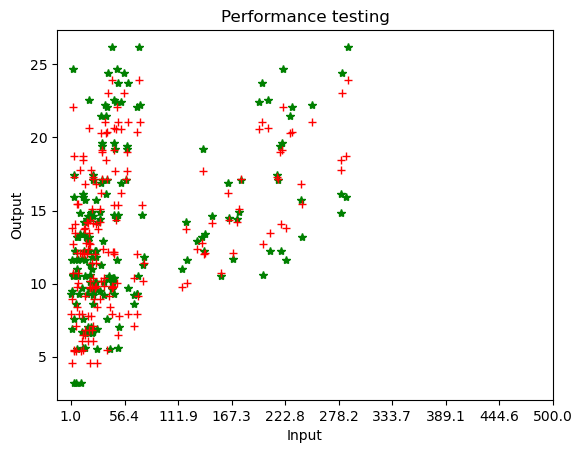

In [31]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, predicted_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

# ASSUMPTIONS OF LINEAR REGRESSION

# HOMOSCEDASTICITY

In [34]:
residuals = y_test - predicted_value

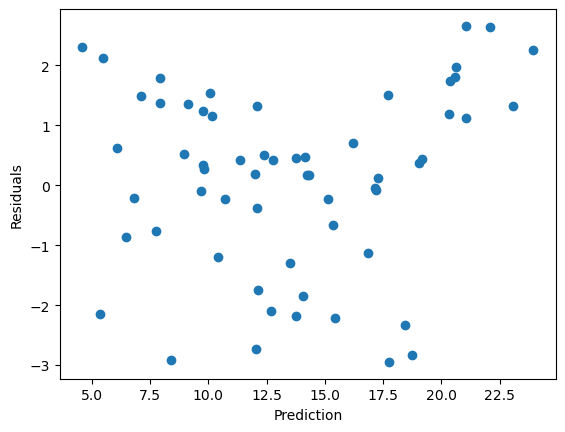

In [35]:
plt.scatter(predicted_value, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

# NORMALITY OF THE RESIDUALS

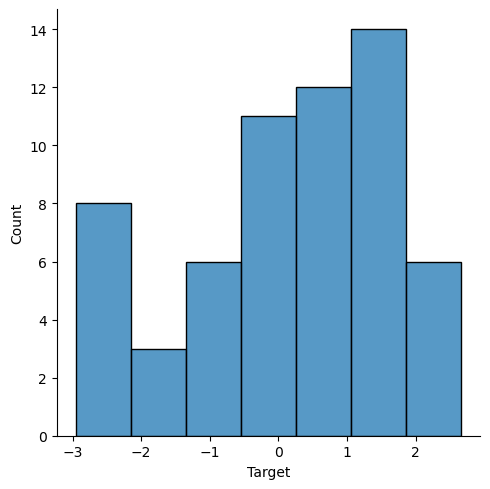

In [37]:
sns.displot(residuals)

# Linear Regression with OLS Summary

In [39]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [63]:
model = sm.OLS(y_train, x_with_constant)
result = model.fit()
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [65]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.67e-63
Time:                        09:04:08   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [69]:
x_test = sm.add_constant(x_test)
y_pred = result.predict(x_test)
residual = y_test - y_pred
np.mean(residual)

0.11398299824532118